## Analysis

In [13]:

import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene
import seaborn as sns
import scipy.stats as stats
from collections import Counter
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
# from sklearn.utils import resample
import numpy as np

In [14]:
input_path = "Merging/Results"
input = os.path.join(input_path, "master_final.csv")


## Plots
### Kreuztabellen

In [ ]:
columns_to_plot = [
    "SelbssicherUnsicher", "MutigAngstlich", "AuffaligUnauffalig", "ManipulativAufrichtig", 
    "MachtigMachtlos", "ExclusivDurchschnitt", "begehrenswertNicht", "BewundertNicht", 
    "PrivilegiertNicht", "WohlhabendNicht", "UberheblichDezent", "IntelligentSchlicht", 
    "EigennutzigUneigen", "VerschwenderischSpar", "MaterialistischIdealistisch", 
    "SpirituellNicht", "NaturverbundenNaturfern", "AuthentischKunstlich", 
    "EmpathischGefuhlskalt", "RomantischNicht", "FriedlichAggressiv", 
    "FreundlichUnfreundlich"
]

### Alter

In [ ]:
# Alterskategorien erstellen
df=pd.read_csv(input)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Alter_Cat"] = pd.cut(
    df["Age"],
    bins=[-float('inf'), 17, 18, 19, 20, 21, 22, 23, 24, 25, float('inf')],
    labels=["<18", "18", "19", "20", "21", "22", "23", "24", "25", ">25"]
)

# Gruppieren der Daten nach Alter und Style
age_distribution = df.groupby(["Style", "Alter_Cat"]).size().reset_index(name="n")

# Barplot erstellen
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_distribution,
    x="Alter_Cat",
    y="n",
    hue="Style",
    palette={"Glam": "red", "Hippie": "green"}
)

# Achsenbeschriftungen und Titel
plt.xlabel("Alter")
plt.ylabel("n")
plt.title("Wie alt sind Sie?")
plt.legend(title="Style")
plt.show()

### Gender und Stile--Verteilung

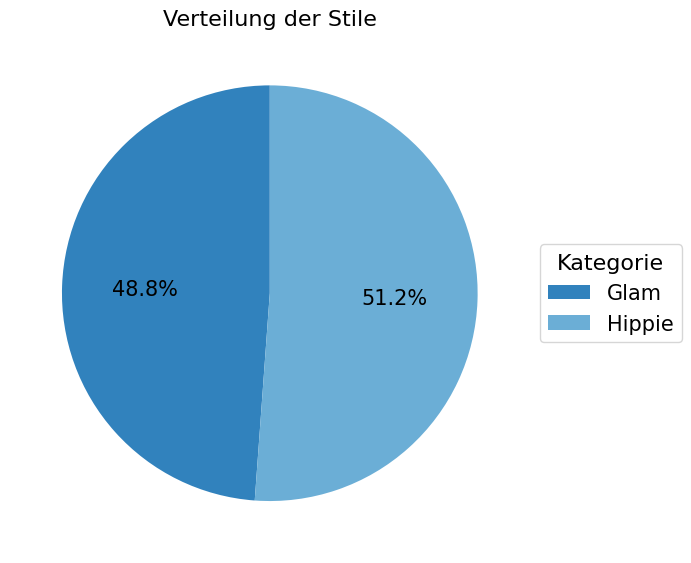

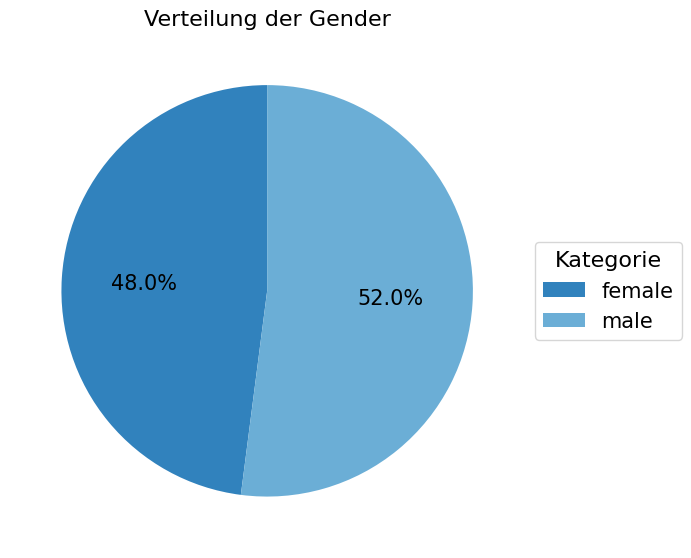

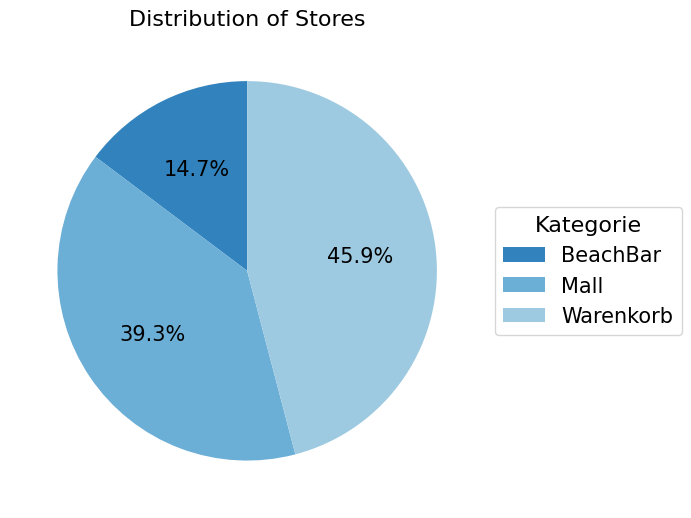

In [25]:
df = pd.read_csv(input)
df.columns = df.columns.str.strip()  # Spaltennamen säubern

# Funktion für besser lesbare Pie-Charts
def plot_pie_with_legend(data_series, title):
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        data_series,
        labels=None,  # Labels nicht direkt in den Plot
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("tab20c"),
        textprops={'fontsize': 15}
    )
    
    plt.legend(
        wedges,
        data_series.index,
        title="Kategorie",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=15,
        title_fontsize=16
    )
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Anwendungsbeispiele
plot_pie_with_legend(df['Style'].value_counts().sort_index(), "Verteilung der Stile")
plot_pie_with_legend(df['Gender'].value_counts().sort_index(), "Verteilung der Gender")
#plot_pie_with_legend(df['Condition'].value_counts().sort_index(), "Distribution of Conditions")
plot_pie_with_legend(df['Store'].value_counts().sort_index(), "Distribution of Stores")


### Assoziationsplot

Merging/Results/master_final.csv


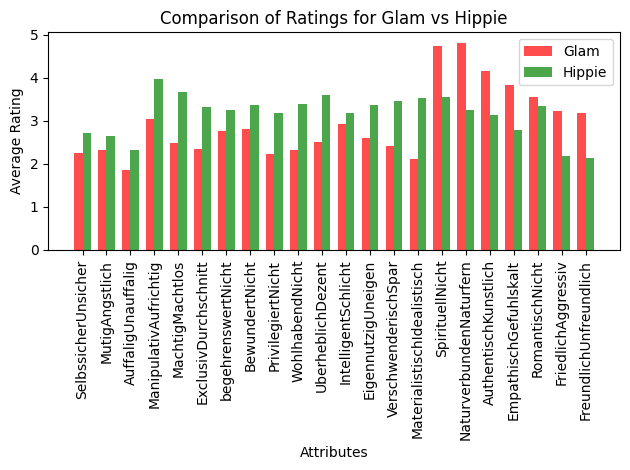

In [ ]:
def plot_glam_vs_hippie_ratings(path, style_column, columns_to_plot):
    # Load the merged data
    df = pd.read_csv(path)
    print(path)

    # Filter rows for "glam" and "hippie"
    glam_df = df[df[style_column].str.contains("glam", case=False, na=False)]
    hippie_df = df[df[style_column].str.contains("hippie", case=False, na=False)]

    glam_means = glam_df[columns_to_plot].mean()
    hippie_means = hippie_df[columns_to_plot].mean()

    # Plot the data
    x = range(len(columns_to_plot))
    bar_width = 0.35

    plt.bar(x, glam_means, width=bar_width, label="Glam", color="red", alpha=0.7)
    plt.bar([pos + bar_width for pos in x], hippie_means, width=bar_width, label="Hippie", color="green", alpha=0.7)

    # Add labels and legend
    plt.xlabel("Attributes")
    plt.ylabel("Average Rating")
    plt.title("Comparison of Ratings for Glam vs Hippie")
    plt.xticks([pos + bar_width / 2 for pos in x], columns_to_plot, rotation=90)
    plt.legend()

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage
#data_path = "/Users/caroline/Desktop/BaMarketing/15.11.Experiment/merged_data.csv"  

style_column = "Style"  

plot_glam_vs_hippie_ratings(input, style_column, columns_to_plot)

/var/folders/14/q6smmykd721g4xgkp2my8d6c0000gn/T/ipykernel_58350/2779526076.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels_left)


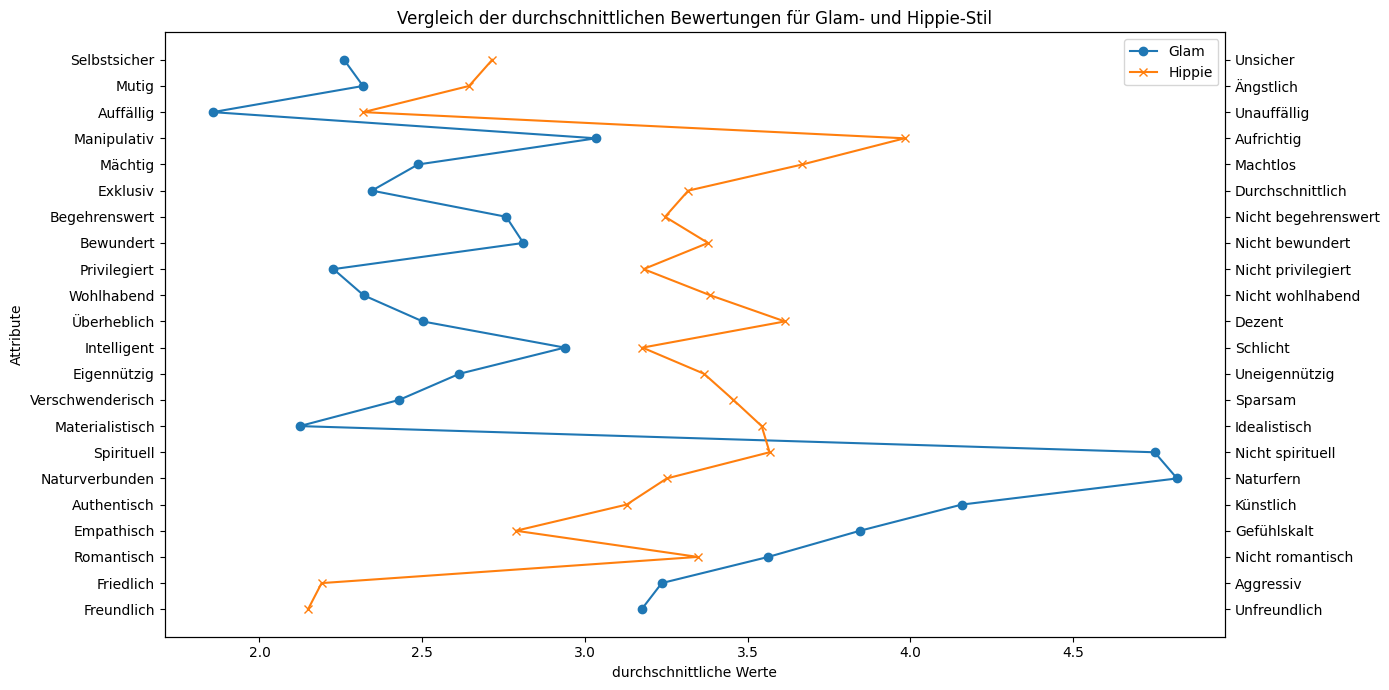

In [20]:
#Assoziationen
# Ensure the dataset is grouped by style and averages are calculated
df = pd.read_csv(input)
asso_merged_df = df

# Definiere die Spalten, die gemittelt werden sollen
# Liste der Spalten, die gemittelt werden sollen

# Mittelwerte pro Stil berechnen
mean_values = df.groupby('Style')[columns_to_plot].mean().T

# Plot erstellen
plt.figure(figsize=(14, 7))
ax1 = plt.gca()

# Linien für jeden Stil plotten
for style in ['Glam', 'Hippie']:
    if style in mean_values.columns:
        ax1.plot(mean_values[style], mean_values.index, label=style, marker='o' if style == 'Glam' else 'x')

# Achsenbeschriftung
ax1.set_xlabel('durchschnittliche Werte')
ax1.set_ylabel('Attribute')
ax1.set_title('Vergleich der durchschnittlichen Bewertungen für Glam- und Hippie-Stil')

# Zweite Y-Achse
ax2 = ax1.twinx()
ax2.set_yticks(ax1.get_yticks())
ax2.set_yticklabels(ax1.get_yticklabels())

# Achsen umdrehen
ax1.invert_yaxis()
ax2.invert_yaxis()

# Linke und rechte Beschriftungen
labels_left = [
    "Selbstsicher", "Mutig", "Auffällig", "Manipulativ", "Mächtig",
    "Exklusiv", "Begehrenswert", "Bewundert", "Privilegiert", "Wohlhabend",
    "Überheblich", "Intelligent", "Eigennützig", "Verschwenderisch",
    "Materialistisch", "Spirituell", "Naturverbunden", "Authentisch",
    "Empathisch", "Romantisch", "Friedlich", "Freundlich"
]

labels_right = [
    "Unsicher", "Ängstlich", "Unauffällig", "Aufrichtig", "Machtlos",
    "Durchschnittlich", "Nicht begehrenswert", "Nicht bewundert", "Nicht privilegiert", "Nicht wohlhabend",
    "Dezent", "Schlicht", "Uneigennützig", "Sparsam",
    "Idealistisch", "Nicht spirituell", "Naturfern", "Künstlich",
    "Gefühlskalt", "Nicht romantisch", "Aggressiv", "Unfreundlich"
]

# Setze die Labels
ax1.set_yticklabels(labels_left)
ax2.set_yticklabels(labels_right)

# Achsenlimits synchronisieren
ax2.set_ylim(ax1.get_ylim())

# Legende und Layout
ax1.legend()
plt.tight_layout()
plt.show()
